<a href="https://colab.research.google.com/github/mfilipak/ACBR-2023/blob/main/ACBR_DAY_FILIPAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORGANIZAÇÃO DESTA PALESTRA:
#### PARTE 1 - EXPLORE E BRINQUE. https://course.fast.ai/
#### PARTE 2 - EXPLORE OS FUNDAMENTOS E TREINE ALGUMAS REDES.
#### PARTE 3 - EXPLORE E ENTENDA OS TIPOS DE DEPLOY
#### PARTE 4 - UM POUCO DE HISTÓRIA - MARCOS IMPORTANTES - EVOLUÇÃO DA I.A
#### FINAL   - SOFTWARE 2.0 E O FUTURO.
<br><br><br>



# PARTE 1 - EXPLORE E BRINQUE.
VOCÊ NÃO COMEÇA A FALAR ESTUDANDO GRAMÁTICA.<br>
VOCÊ NÃO COMEÇA A JOGAR BOLA OU A NADAR LENDO UM LIVRO.<br>
EXISTEM MÚSICOS INCRÍVEIS QUE NUNCA ESTUDARAM TEORIA MUSICAL.<br>
<br>
A TEORIA E O FORMALISMO SÃO IMPORTANTES ESPECIALMENTE NO QUE DIZ RESPEITO À DISRUPÇÃO E A OTIMIZAÇÃO MAS NÃO CONHEÇO NENHUM CIENTISTA DA COMPUTAÇÃO, MATEMÁTICO QUE TENHA COMEÇADO POR AÍ.
<br>
SUGESTÃO DE UM PONTO DE PARTIDA: https://course.fast.ai/


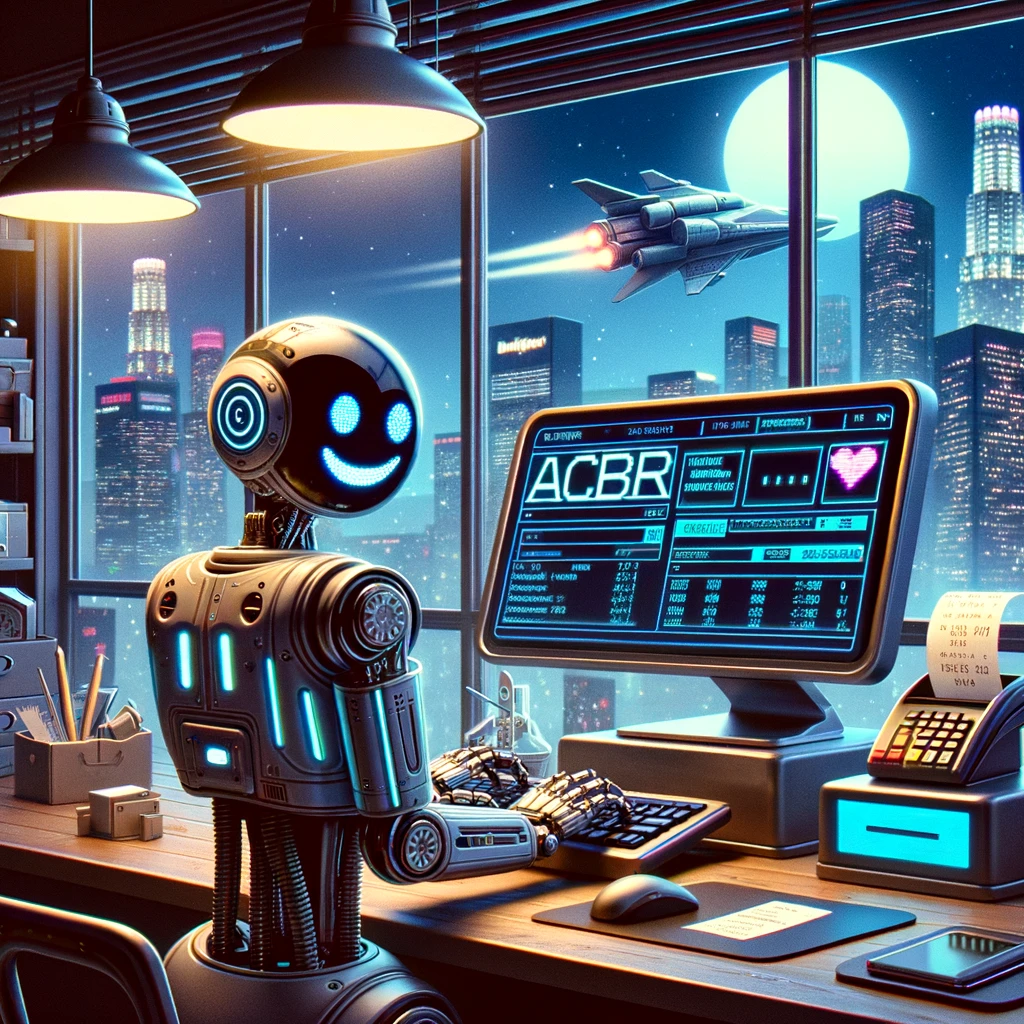

# A Imagem acima foi gerado com o chat gpt-4 integrado com o modelo DAL-E3. Existem vários modelos que também possuem resultados impressionantes, explore como usuário. Veja abaixo o prompt utilizado.

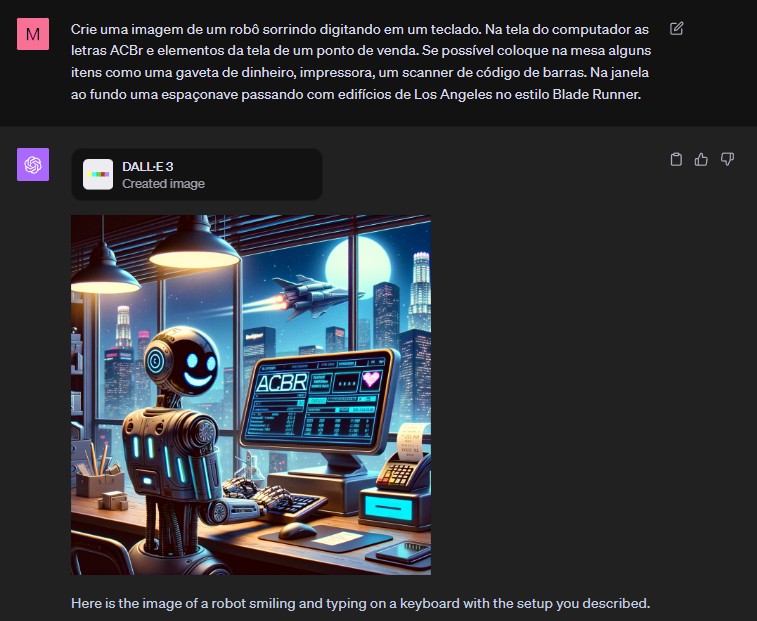

Dia 09/11 ao abrir o chat gpt fui surpreendido com essa informação:

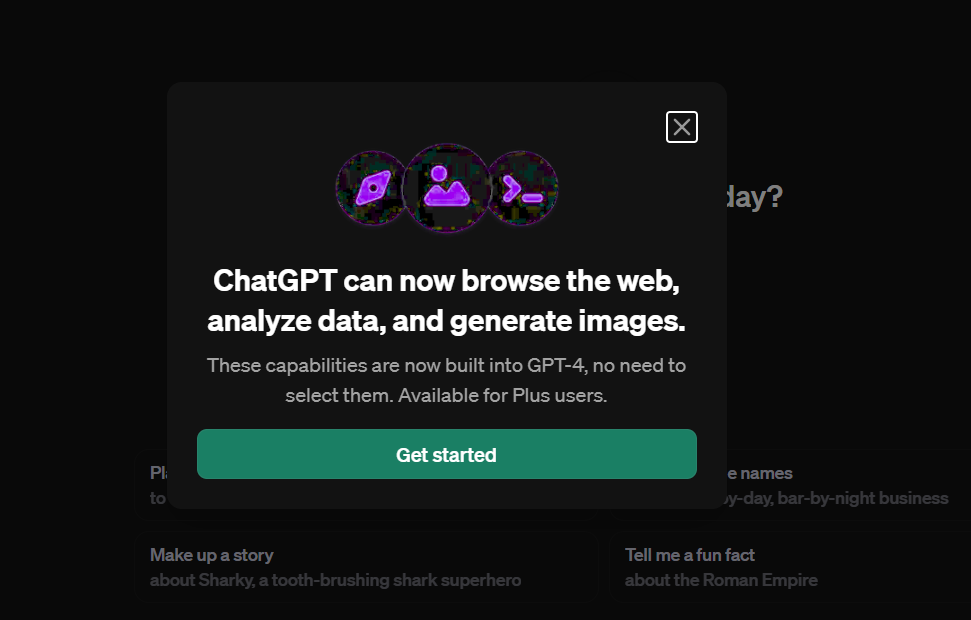

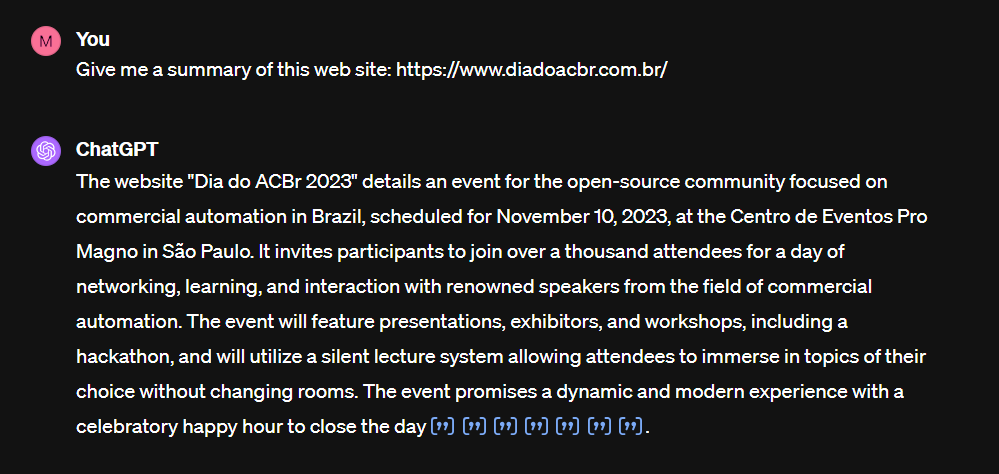

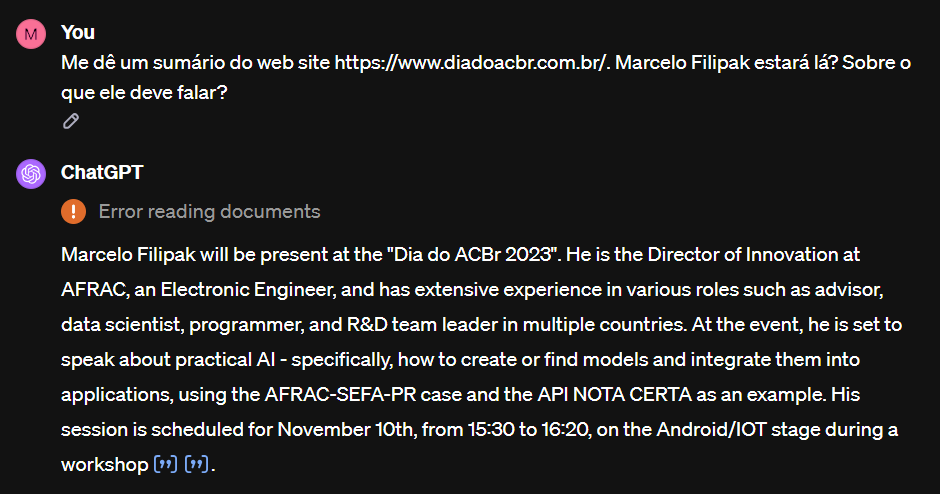

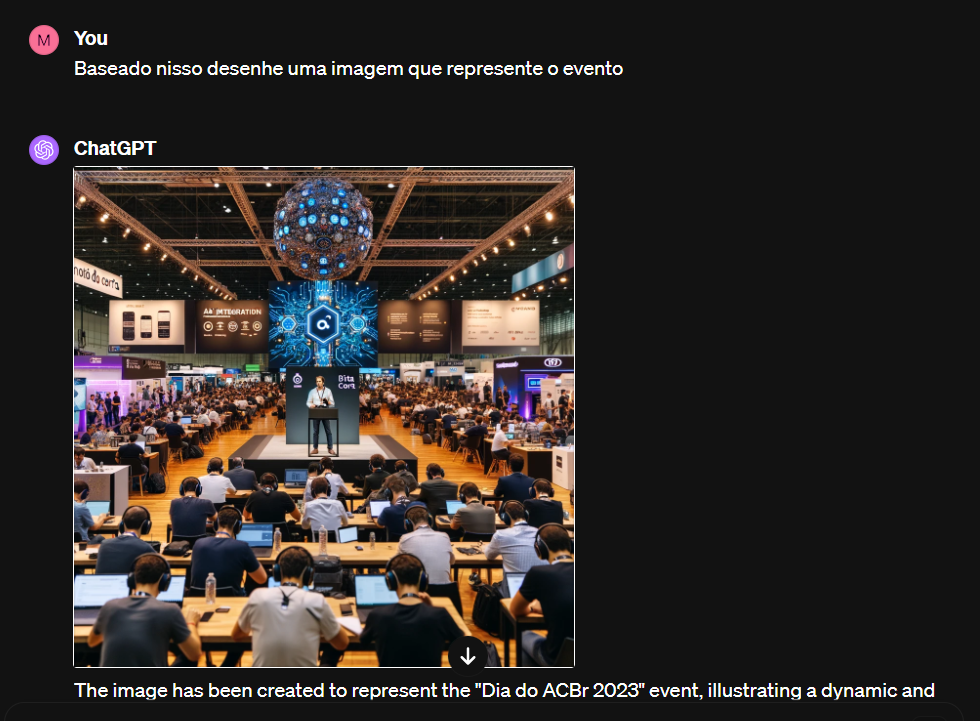

# E se eu quiser usar essa tecnologia em uma aplicação ou em algum protótipo?
A forma mais simples de experimentar rápido é utilizando APIs (web services na nuvem, em servidores próprios ou até mesmo local servers)

Se você não está familiarizado com python e jupyter, esse ambiente onde o código dessa apresentação roda se chama colab hospedado em servidores do google. É muito interessante especialmente para estudo e prototipação pois você tem o python e os frameworks mais usados em data science e machine learning previamente instalados.<br>
A partir daqui iremos rodar alguns códigos, você não precisa rodar se quiser somente ver mas eu recomendo que você rode e explore modificando o código.

In [1]:
#Importando bibliotecas
!pip install openai
import openai
from google.colab import userdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [2]:
#Definindo uma função para chamar o chatgpt

#Obtenha sua API KEY em https://platform.openai.com/api-keys
openai.api_key = userdata.get('OPENAI')

def ChatGPT(prompt):
  try:
    result = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":prompt}])
    return result.choices[0].message.content
  except Exception as e:
    print(e)

In [3]:
#Vamos criar um classificador de sentimentos usando chat gpt
def ClassifiqueEssaExpressão(prompt):
  return ChatGPT(f"Eu quero que você qualifique o texto entre << e >> como positivo ou negativo. \
Por exemplo <<O dia está bonito >> é positivo.\
Por favor, responda somente com positivo ou negativo, nenhuma palavra a mais\
<< {prompt} >>")

In [ ]:
# Imaginem que as strings abaixo são
for prompt in ["Filminho Horroroso.", "Dia Lindo.", "Não é ruim não.", "Uma bela duma porcaria.", "É bão", "Não é bão", "Pra ficar ruim tem que melhorar muito", "Pra ficar bom tem que melhorar muito"]:
  print(ClassifiqueEssaExpressão(prompt), prompt)

negativo Filminho Horroroso.
positivo Dia Lindo.
positivo Não é ruim não.
negativo Uma bela duma porcaria.
positivo É bão
negativo Não é bão
negativo Pra ficar ruim tem que melhorar muito
negativo Pra ficar bom tem que melhorar muito


# LLMs (Large Language Models) são incríveis para tarefas que requerem uma compreensão mais profunda da língua e são capazes de dar ótimas sugestões, sendo muitas vezes criativas. Mas não espere precisão em tarefas especializadas.

In [5]:
# Vamos tentar usar o chat gpt para inferir um tipo de classificação fiscal de um produto (o NCM) a partir de sua descrição
def GPTNCM(prompt):
    return ChatGPT(f"Eu quero que você sugira qual o NCM do produto cuja descrição está entre << e >>. \n\
Por exemplo <<REFRIGERANTE COCA-COLA GARRAFA 2L >> é 2202.10.00\n\
Por favor, responda somente com o número do NCM com 8 dígitos e 2 pontos, nenhuma palavra a mais\n\
Por favor, responda somente com o número do NCM com 8 dígitos e 2 pontos, nenhuma palavra a mais\n\
<< {prompt} >>")

In [6]:
GPTNCM("Batata Frita Elma Chips")

'2004.10.90'

In [7]:
#Algo estranho aconteceu aqui...
for i in range(5):
  print(i, "O NCM do Halls Cereja é: ", GPTNCM("Halls Cereja"))

0 O NCM do Halls Cereja é:  1704.90.20
1 O NCM do Halls Cereja é:  2008.19.00
2 O NCM do Halls Cereja é:  1704.90.20
3 O NCM do Halls Cereja é:  1806.90.00
4 O NCM do Halls Cereja é:  1704.90.11


# PROJETO AFRAC NOTA CERTA
https://huggingface.co/spaces/AFRAC/NCM_DEMO
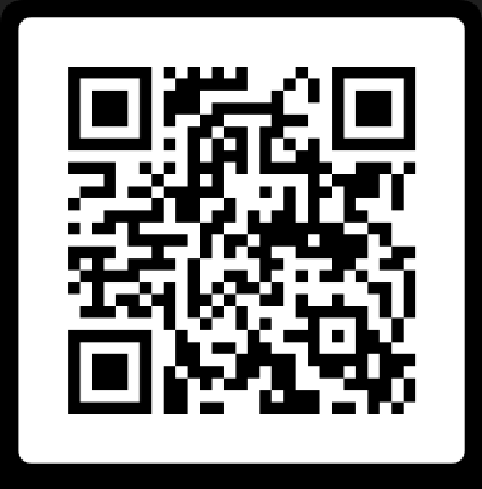

Esse modelo / API é produto de uma parceria da AFRAC com a SEFA-PR.Usando dados de descrição e ncm reais foi possível treinar um modelo com um resultado inicial muito interessante.


In [8]:
import requests

def AfracNCM(prompt):

  url = "https://afrac-ncm-demo.hf.space/api/predict"

  payload = { "data": [f"{prompt}"]}

  headers = { "Content-Type": "application/json" }

  response = requests.post(url, json=payload, headers=headers)
  result = response.json()
  return result


In [9]:
AfracNCM("Batata Frita Elma Chips")

{'data': [{'label': '20052000',
   'confidences': [{'label': '20052000', 'confidence': 0.5751689672470093},
    {'label': '19059090', 'confidence': 0.10851659625768661},
    {'label': '19041000', 'confidence': 0.08567241579294205},
    {'label': '19049000', 'confidence': 0.01533182617276907},
    {'label': '21069090', 'confidence': 0.012042242102324963}]},
  'Preparações de produtos hortícolas, fruta ou de outras partes de plantas.Outros produtos hortícolas preparados ou conservados, exceto em vinagre ou em ácido acético, não congelados, com exceção dos produtos da posição 20.06.- Batatas'],
 'is_generating': False,
 'duration': 0.043077707290649414,
 'average_duration': 0.05073289076487223}

In [13]:
#Nesse modelo os resultados são consistentes.
item = "HALLS CEREJA"
for i in range(5):
  print(i,f"O NCM DE {item} é",AfracNCM(item)["data"][0]["label"])

0 O NCM DE HALLS CEREJA é 17049020
1 O NCM DE HALLS CEREJA é 17049020
2 O NCM DE HALLS CEREJA é 17049020
3 O NCM DE HALLS CEREJA é 17049020
4 O NCM DE HALLS CEREJA é 17049020


# PARTE 2 - EXPLORE OS FUNDAMENTOS E TREINE ALGUMAS REDES.
Agora que você aprendeu a usar a I.A, como usuário ou consumindo APIs de alto nível você pode estar atiçado por uma curiosidade de como essa "magia negra" realmente funciona.<br>
Você pode ter necessidades específicas como desempenho, custo e/ou mesmo funcionalidades que necessitam de um ajuste. Nesse cenário é bom levantar o capô e dar uma olhada no motor.

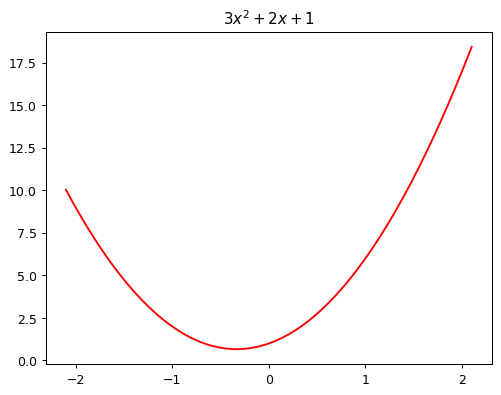

In [25]:
#Esse é um pequeno trecho do curso fast.ai que dá uma boa intuição do que é treinar uma rede.
#Na verdade é um problema clássico da estatística chamado regressão linear (ou polinomial)
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    plt.show()

def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

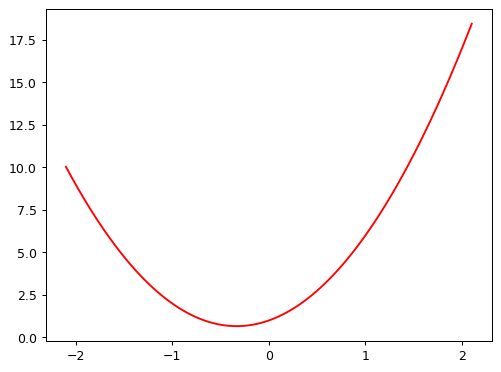

In [23]:
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)
f2 = mk_quad(3,2,1)
plot_function(f2)

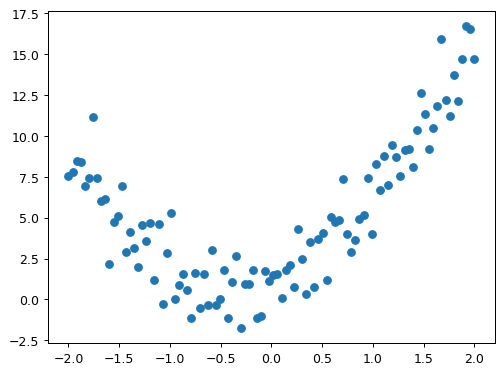

In [21]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
np.random.seed(42)

x = torch.linspace(-2, 2, steps=100)[:,None]
y = add_noise(f(x), 0.15, 1.5)
plt.scatter(x,y);

In [22]:
@interact(a=3., b=1., c=2.)
def plot_quad(a, b, c):
#    clear_output()
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='a', max=9.0, min=-3.0), FloatSlider(value=1.0, descr…

In [26]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")
    plt.show()

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## A técnica / algoritmo que permite ajustar esses parâmetros se chama gradiente descendente. É algo relativamente simples e intuitivo, semelhante ao que fizemos mexendo os 3 parâmetros acima, você mede o quanto uma variação no parâmetro muda o erro (loss function) e aplica uma variação no parâmetro proporcional a esse erro multiplicado por um fator normalmente empírico chamado taxa de aprendizado (learning rate).
## Esse algoritmo funciona inclusive fazendo os cálculos parâmetro por parâmetro mas dessa forma ele não é paralelizável nem eficiente.
## O método que permitiu tornar o gradiente descendente eficiente se chama "back propagation".
## Pra entender como esse algoritmo funciona ajuda muito ter um curso intrdutório de calculo diferencial e álgebra linear. Mas felizmente com os frameworks existentes você pode abstrair isso.

https://playground.tensorflow.org/
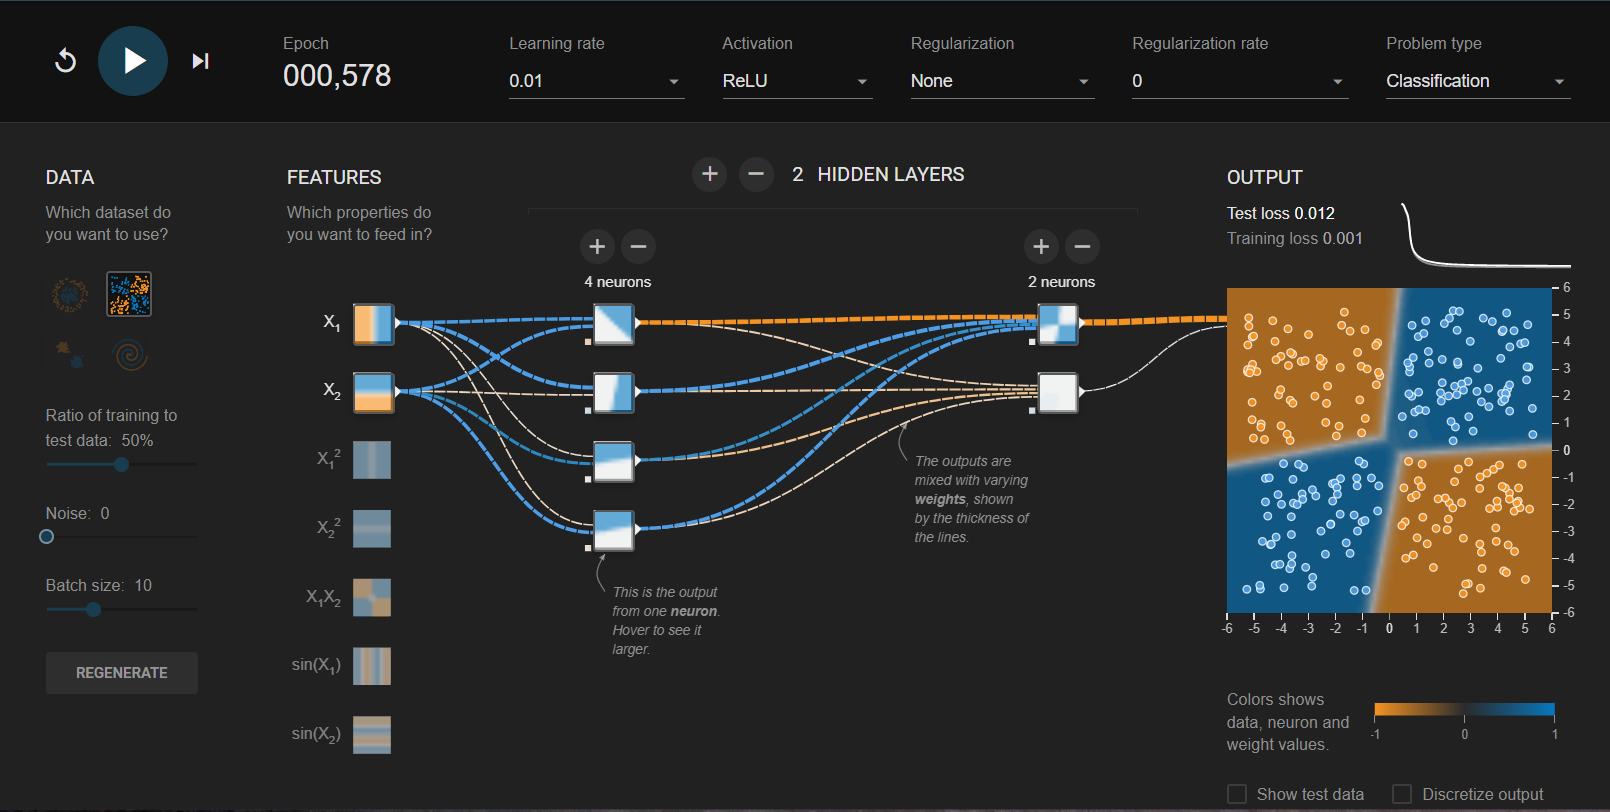

# E nosso amigo e assistente chatgpt, será que ele saberia sugerir um código para uma rede neural que a gente pudesse rodar aqui?

In [ ]:
ChatGPT("Preciso de um código python para treinar um modelo que reconheça caracteres escritos à mão usando redes neurais")

"Certamente! Aqui está um exemplo de código em Python usando a biblioteca TensorFlow para treinar um modelo de reconhecimento de caracteres escritos à mão usando redes neurais convolucionais.\n\n```python\nimport tensorflow as tf\nfrom tensorflow.keras.datasets import mnist\n\n# Carrega os dados de treinamento e teste do MNIST\n(x_train, y_train), (x_test, y_test) = mnist.load_data()\n\n# Pré-processamento dos dados\nx_train = x_train.reshape((x_train.shape[0], 28, 28, 1))\nx_test = x_test.reshape((x_test.shape[0], 28, 28, 1))\nx_train, x_test = x_train / 255.0, x_test / 255.0\n\n# Define o modelo da rede neural convolucional\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),\n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(10, activation='softmax')\n])\n\n# Compila o modelo\nmodel.compile(optimizer='adam',\n   

In [27]:
#Nesse exemplo ele acertou de primeira conforme pode ser visto mais adiante.
#Possivelmente se eu ficasse perguntando de novo ele eventualmente estragasse o código, mas afirmo que o código abaixo foi somente CTRL C CTRL V do chat gpt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Criar o modelo da rede neural convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Avaliar o modelo com os dados de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Acurácia do modelo nos dados de teste:", test_acc)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 77s 81ms/step - loss: 0.1754 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0263 - accuracy: 0.9924
Acurácia do modelo nos dados de teste: 0.9923999905586243


313/313 [==============================] - 4s 12ms/step


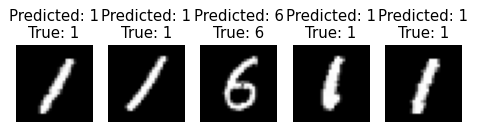

In [28]:
#Pedi que o chat gpt me gerasse um código que permitisse visualizar os resultados, ele também gerou um código válido.

import numpy as np
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
predictions = model.predict(test_images)

# Selecionar aleatoriamente 5 índices de exemplos no conjunto de teste
random_indices = np.random.choice(len(test_images), 5, replace=False)

# Exibir as imagens e as previsões correspondentes
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(test_labels[index])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()

Perguntei ao chatgpt:
"Queria um código que mostrasse os resultados nas mesmas imagens acima porém com as imagens de teste sofrendo uma rotação de 30 graus nas predições."

Ele me deu o código abaixo:

1/1 [==============================] - 0s 17ms/step


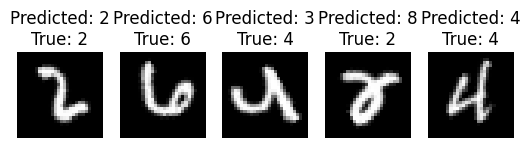

In [ ]:
import cv2
# Exibir as imagens de teste com rotação de 30 graus nas previsões
for i, index in enumerate(random_indices):
    original_image = test_images[index].reshape(28, 28) * 255  # Desfazer a normalização e escala
    original_image = original_image.astype(np.uint8)  # Converter para uint8

    # Rotação de 30 graus nas imagens de teste
    M = cv2.getRotationMatrix2D((14, 14), 30, 1)  # Rotação em torno do centro
    rotated_test_image = cv2.warpAffine(original_image, M, (28, 28), flags=cv2.INTER_LINEAR)

    # Fazer previsões na imagem rotacionada
    #rotated_test_image = rotated_test_image.astype('float32') / 255

#ESSA FOI A ÚNICA CORREÇÃO QUE PRECISEI FAZER
    rotated_test_image = rotated_test_image.astype('float32')[...,None] / 255


    rotated_test_image = np.expand_dims(rotated_test_image, axis=0)  # Adicionar dimensão de lote
    predicted_label = model.predict(rotated_test_image)
    predicted_label = np.argmax(predicted_label)

    plt.subplot(1, 5, i + 1)
    plt.imshow(rotated_test_image[0], cmap='gray')
    true_label = np.argmax(test_labels[index])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

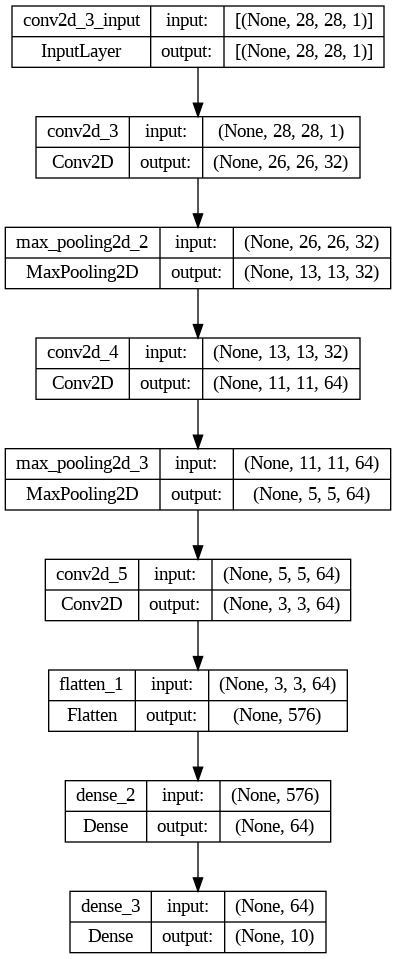

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image


# Mostrar a representação gráfica da rede neural
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# Exibir a imagem na célula do notebook
Image(filename='model.png')

https://adamharley.com/nn_vis/cnn/3d.html
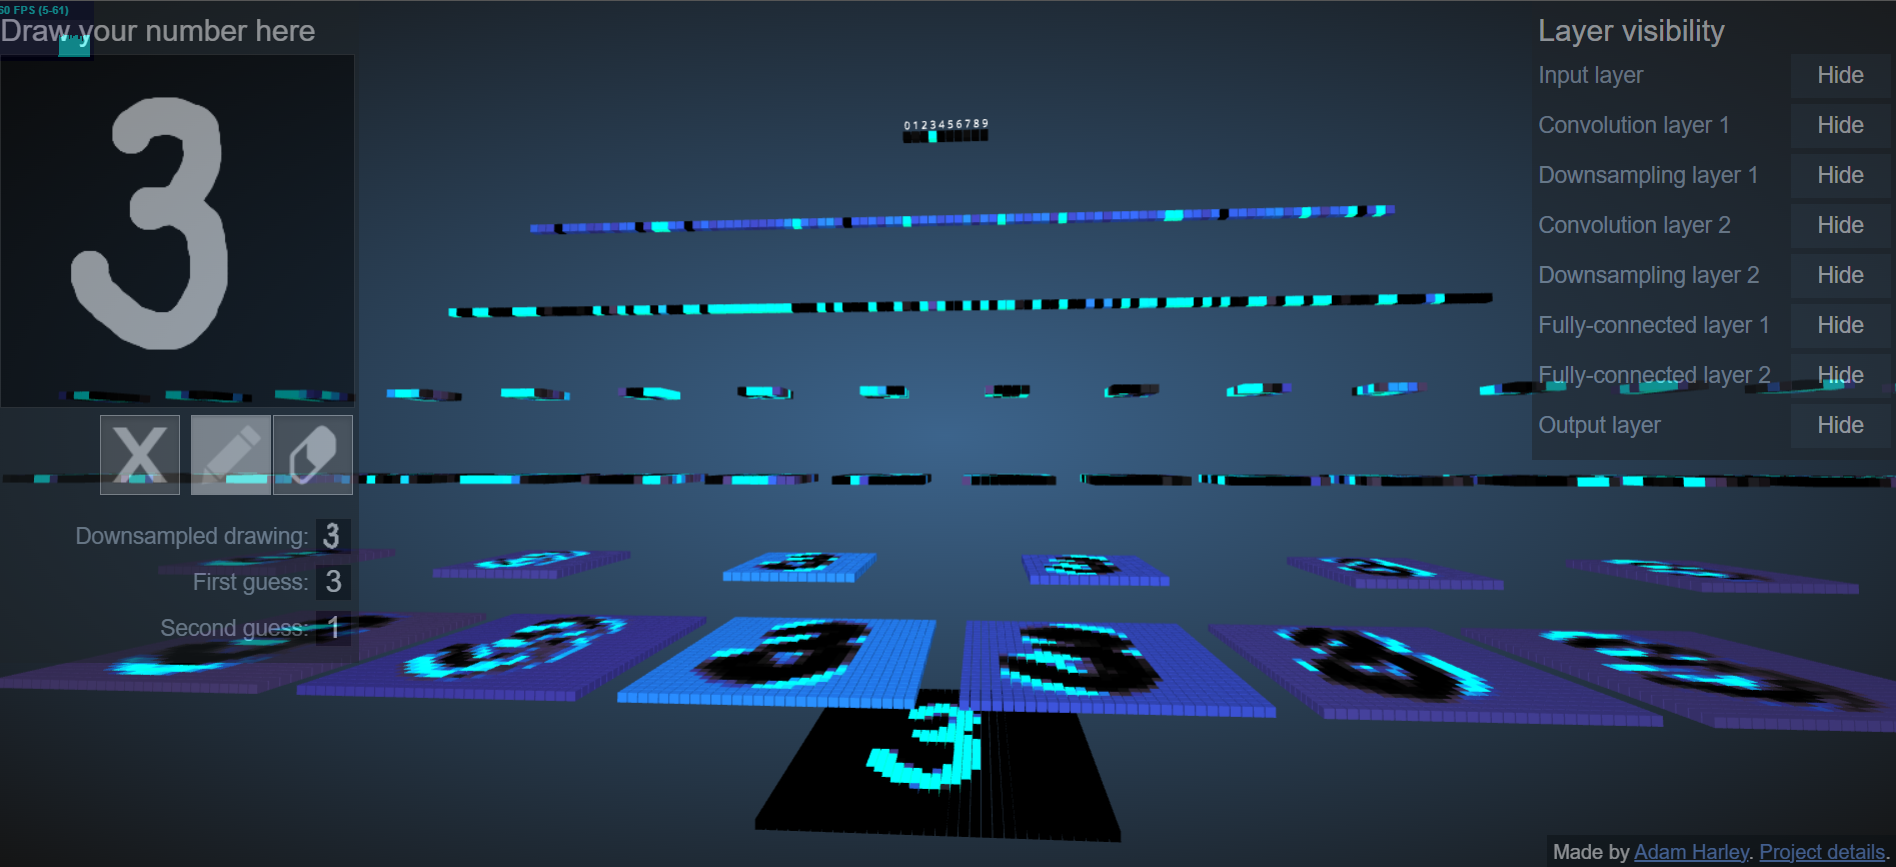

# PARTE 3 - EXPLORE E ENTENDA OS TIPOS DE DEPLOY
Olhe com atenção os tempos dos experimentos com a rede acima.
Foram 5 minutos para treinar a rede mas a predição para uma imagem única é da ordem de 10ms. Da ordem de 30.000 vezes mais rápido.
## Existem frameworks especializados em inferência como tensorflow lite, ONNX, Openvino, Tensorflow JS e até mesmo para converter redes para rodar em computadores analógicos.
Para ilustrar vejam essa rede que detecta pontos característicos da face, ela roda puramente no browser, abstraindo o hardware através de wasm e web gl. Já rodei códigos com esse framework com um único deploy em windows, linux, android e ios rodando em máquinas que vão de raspberry PI, smartphones low end, Iphones, PCs com e sem GPU. Você pode testar no PC, celular, IPAD e vai rodar bem.<br>
Esse é um exemplo do que se chama "EDGE COMPUTING", use o hardware local do seu cliente e não dos servidores. Outra vantagem é a baixa latência.

https://storage.googleapis.com/tfjs-models/demos/face-landmarks-detection/index.html?model=mediapipe_face_mesh

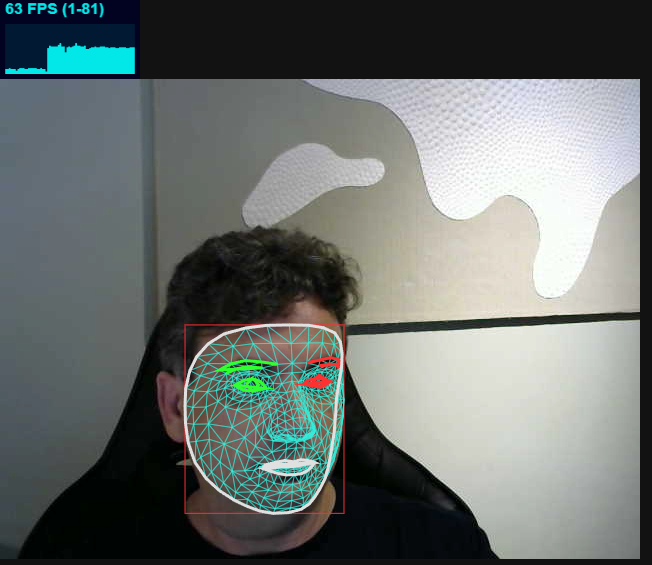

# Se você pressionar F12 enquanto a aplicação roda vai poder ver que o modelo está contido em um componente Javascript.

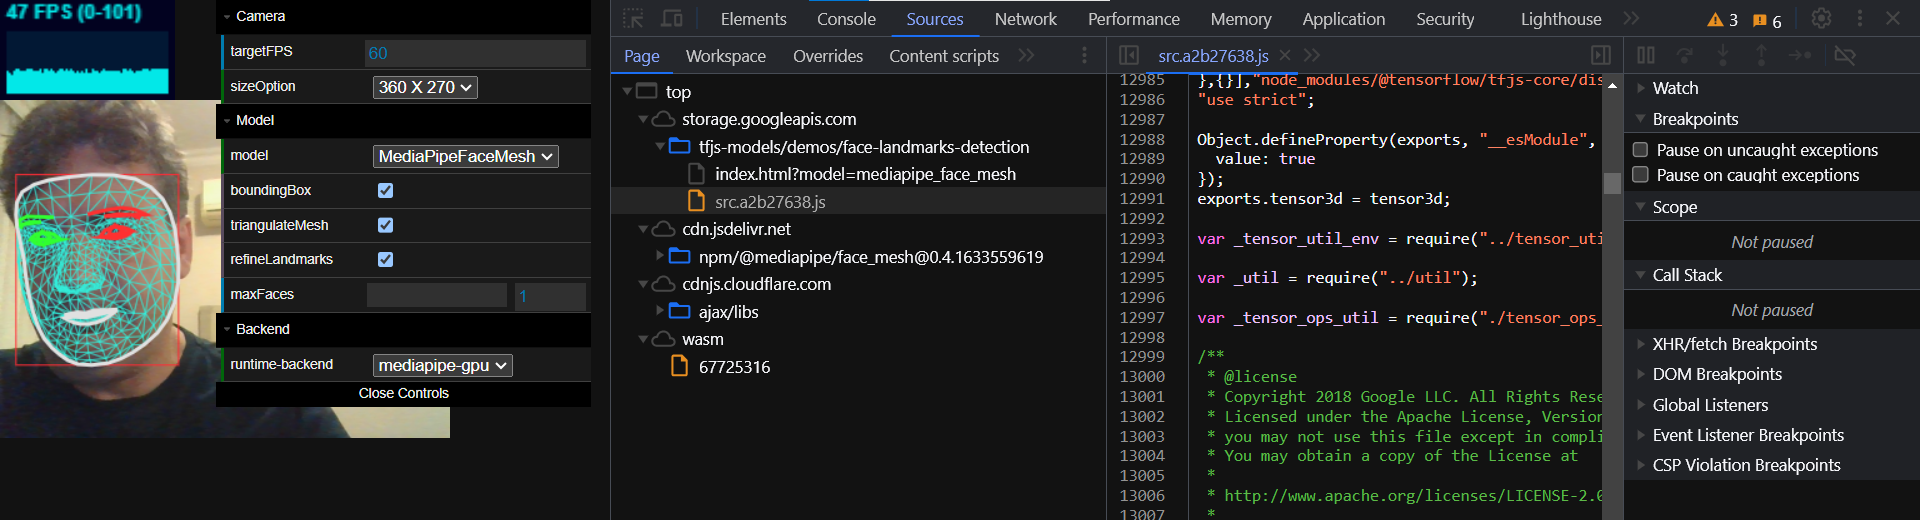


# PARTE 4 - UM POUCO DE HISTÓRIA - MARCOS IMPORTANTES - EVOLUÇÃO DA I.A

1. **1957 - Perceptron**: Modelo de rede neural artificial desenvolvido por Frank Rosenblatt.
2. **1960s - Gradiente Descendente**: Método de otimização usado para o treinamento de redes neurais.
3. **1970s - Backpropagation**: Algoritmo para o treinamento de redes neurais multicamadas.
4. **Anos 1970 e 1990 - Inverno da IA**: Períodos de redução no interesse e financiamento para IA.
5. **1980 - Redes Convolucionais**: Especializadas para processar dados como imagens.
6. **2009 - ImageNet**: Dataset de imagens para treinar sistemas de visão computacional.
7. **2012 - AlexNet**: Rede convolucional que foi significativa no reconhecimento de imagens.
8. **2017 - Transformers**: Modelo baseado em atenção para processamento de linguagem natural.
9. **Anos 2010s - IA Generativa**: Técnicas como GANs e VAEs para gerar dados sintéticos.
10. **2020s - Stable Diffusion**: Modelo generativo que cria imagens a partir de descrições textuais.
11. **2020s - Modelos de Linguagem de Grande Escala (LLMs)**: Como o GPT-3, avançados na compreensão e geração de texto.


# "DATA IS THE NEW OIL"
#####2006 Clive Humby
<br><br>
# "AI IS THE NEW ELECTRICITY"
#####2016 Andrew Ng
"Assim como a eletricidade transformou quase tudo há 100 anos, hoje tenho dificuldade em pensar em uma indústria que a IA não vá transformar nos próximos anos."

Ele destaca que a IA, assim como a eletricidade, tem o potencial de revolucionar diversas indústrias, incluindo transporte, manufatura, agricultura, saúde e mais, mudando fundamentalmente a maneira como o mundo opera​​.

Para uma perspectiva histórica que envolva não somente o avanço da técnica mas também das big techs indico:
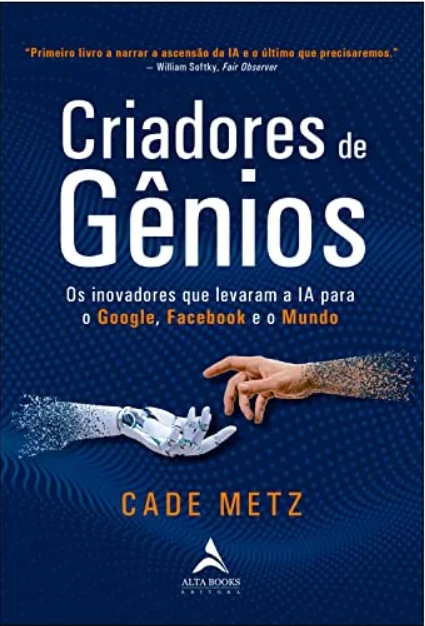

#ATENÇÃO - Por uma questão de foco e relwvância falei exclusivamente de redes neurais. Sem dúvida existem problemas que só com redes neurais foram possíveis ter avanços significativos especialmente na última década.
# Existem inúmeras situações onde outros métodos são melhores, ou apresentam menos riscos (não falamos do problema do viés por exemplo.
# Para citar um exemplo que é bastante comum na automação comercial, existe muito dado em tabela (tabular) e nem sempre constituem um big data, nessas situações é bastante comum algoritmos baseados em boosting e árvores de decisão serem mais eficazes.

# FINAL - SOFTWARE 2.0 E O FUTURO.
 https://karpathy.medium.com/software-2-0-a64152b37c35



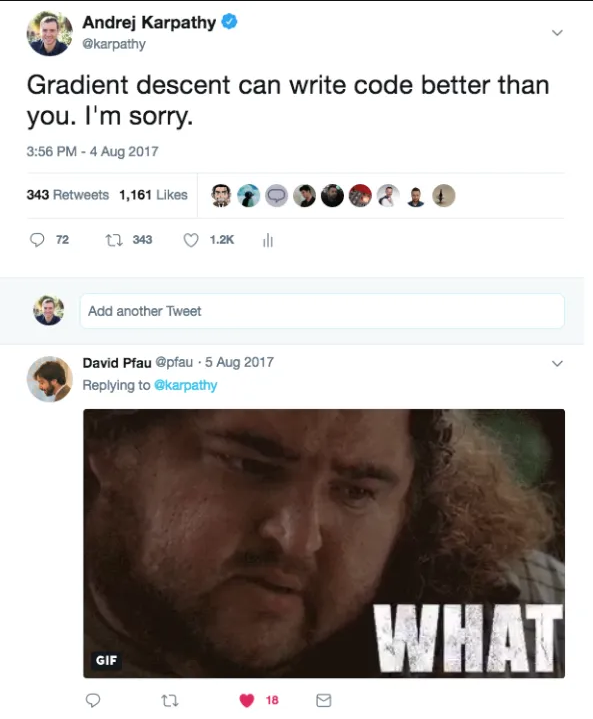

## Software 2.0 é um termo usado por Andrej Karpathy. Enquanto o Software 1.0 é baseado em código explicitamente programado por humanos, o Software 2.0 é criado pelo treinamento de modelos de aprendizado de máquina, como redes neurais, que aprendem a partir de grandes conjuntos de dados. Este paradigma está se tornando predominante em áreas que envolvem o processamento de imagens, vídeos, som e fala, superando as abordagens tradicionais de programação devido à sua eficiência, portabilidade e desempenho superior em tarefas complexas.

# I.A é eletricidade,é força motriz intelectual e vai trazer mais progresso e oportunidade do que ameaças.
# Existe muito mais coisa pra ser feita do que programadores qualificados para fazê-las. A I.A vai se somar e dar mais qualidade e produtividade aos programadores. Tarefas horríveis como traduzir código de uma linguagem pra outra passarão a ser feitos com naturalidade, hoje é quase impossível alguém se dedicar a isso só para citar um exemplo. Programadores vão continuar existindo, inclusive pessoas de outras áreas vão se tornar programadores medianos em pouquíssimo tempo se assistido por uma I.A.

Links:<br>
https://paperswithcode.com/

